<img style="float: right;" src="https://upload.wikimedia.org/wikipedia/commons/f/f5/Best_Buy_Logo.svg" alt="bb logo" width="100"/>

<h1><FONT COLOR=#0000E5>BESTBUY </FONT COLOR=#195071>Televisions</h1>

## 📉 Data Analysis <SPAN STYLE="font-size:18.0pt;font-family:Georgia;">II</span>

In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### import bb_clean.csv as "bb"

In [3]:
bb = pd.read_csv('python_proj\\bb_clean.csv')
bb = bb.set_index('sku')

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

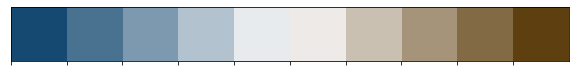

In [5]:
n_plots = 10
sns.palplot(sns.diverging_palette(245,50, s=90, l=30, sep=20, n=n_plots))

In [6]:
#sns.set(rc={'axes.facecolor':'#a1b3cc', 'figure.facecolor':'w'})

### Quick plot of all data points, and see if removing outliers is necessary

In [7]:
n_plots = 10
sns.set_palette(sns.color_palette("cividis", n_plots), n_plots)
# Cividis Color Palette from: #00204c to #ffe945

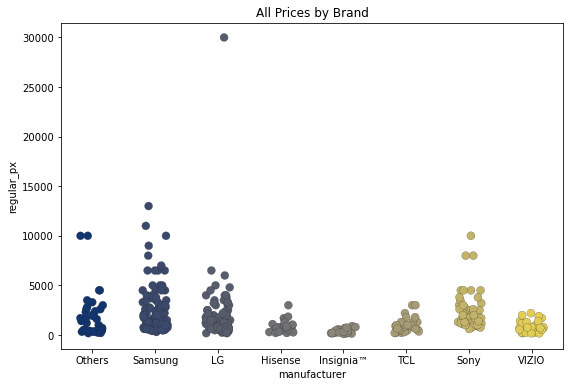

In [8]:
fig = plt.gcf()
fig.set_size_inches(9,6)
sns.stripplot(data = bb, x='manufacturer', y='regular_px', jitter=0.2, 
              size=8, palette="cividis", linewidth=0.2).set_title('All Prices by Brand')
plt.show()

#### Get rid of the monstrous outlier TV from manufacturer LG
- go through each manuf and remove price outliers ( >3 std)

In [9]:
from python_proj.daniel_tools import rem_outlier

In [10]:
bby = rem_outlier(bb,'regular_px', 3)

In [11]:
# 8 rows removed
bby.shape[0] - bb.shape[0]

-8

<h2>Television <FONT COLOR=#FF0000>Pricing</FONT COLOR=#FF0000> & correlation with:</h2>

- ScreenSize, Resolution, DisplayType, Bezel, Weight, ReviewScore, SmartCapable, WarrantyYears, EnergyCons, & RefreshRate

#### Most of the data we need for calculation of correlation is already in dtype=float64, except Resolution...
    4K (2160p) | 8K (4320p) | Full HD (1080p) | HD (720p)
    
- convert Resolution object to float64 (in # of pixels) using **regex (\d{3,})** = *consecutive 3 or more digits*

In [12]:
bby['res_pixels'] = bby.resolution.str.extract('(\d{3,})').astype('int64')

In [13]:
bby.res_pixels.head()

sku
6466022    2160
6414244    2160
6461913    2160
6466017    2160
5900939    2160
Name: res_pixels, dtype: int64

#### And also *display type*...(ordered below from expensive to cheap)
    OLED | QLED | ULED | LED
    4    | 3    | 2    | 1
- so we will convert display type to an ordinal value 4,3,2,1 (4 as most expensive)

<AxesSubplot:xlabel='display_type', ylabel='regular_px'>

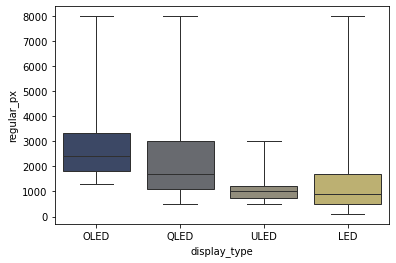

In [14]:
# quick check to see price diffs with boxplot
sns.boxplot(data = bby, x='display_type', y='regular_px', order=['OLED','QLED','ULED','LED'],
                palette='cividis', linewidth=1, whis=np.inf)

In [15]:
# Set conversion dictonary and apply to ['display_type'] column
convert_dict = {'OLED':4,'QLED':3,'ULED':2,'LED':1}
bby.display_type = bby.display_type.apply(lambda x: convert_dict[x])

## Make the correlation matrix

In [16]:
# Create separate DF for calculation of correlations
bb_corr = bby[['regular_px','screen_size','res_pixels','display_type','bezel','weight_nostand',
               'smart_capable','warranty_yrs','energy_KWh','refresh_Hz']]
bb_corr.columns = ['PRICE','SIZE','RES','DISP','BEZ','WGT','SMRT','WARR','ENRG','RFSH']

In [17]:
bb_corr.corr()

,PRICE,SIZE,RES,DISP,BEZ,WGT,SMRT,WARR,ENRG,RFSH
PRICE,1.000000,0.590472,0.585313,0.364238,0.206958,0.717733,-0.065824,0.152353,0.604754,0.613164
SIZE,0.590472,1.000000,0.500605,0.187312,0.437997,0.912607,0.194531,0.004849,0.649311,0.410185
RES,0.585313,0.500605,1.000000,0.189326,0.258699,0.485430,0.138195,-0.003826,0.664956,0.392616
DISP,0.364238,0.187312,0.189326,1.000000,0.258366,0.145570,0.190746,-0.116567,0.136820,0.450826
BEZ,0.206958,0.437997,0.258699,0.258366,1.000000,0.289259,0.303449,-0.093133,0.284638,0.300006
WGT,0.717733,0.912607,0.485430,0.145570,0.289259,1.000000,0.046017,0.078659,0.651879,0.480850
SMRT,-0.065824,0.194531,0.138195,0.190746,0.303449,0.046017,1.000000,-0.547692,0.072748,0.205032
WARR,0.152353,0.004849,-0.003826,-0.116567,-0.093133,0.078659,-0.547692,1.000000,-0.041965,-0.038111
ENRG,0.604754,0.649311,0.664956,0.136820,0.284638,0.651879,0.072748,-0.041965,1.000000,0.428055
RFSH,0.613164,0.410185,0.392616,0.450826,0.300006,0.480850,0.205032,-0.038111,0.428055,1.000000


<AxesSubplot:>

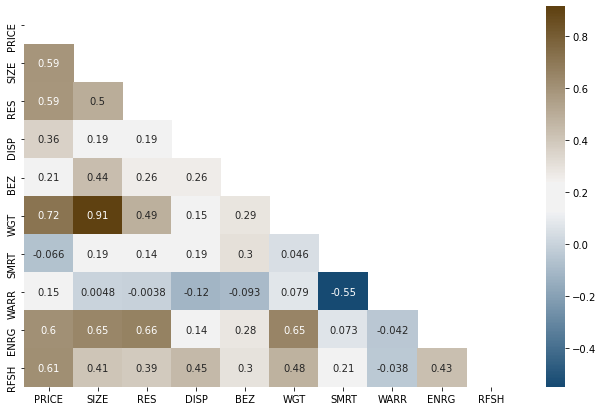

In [18]:
fig, ax = plt.subplots(figsize=(11, 7))

# Hide upper redundant heatmap
hide = np.triu(np.ones_like(bb_corr.corr(), dtype=bool))

# Configure a custom diverging colormap
n_plots = 10
cmap = sns.diverging_palette(245,50, s=90, l=30, sep=20, n=n_plots, as_cmap=True)

# Draw the heatmap
sns.heatmap(bb_corr.corr(), annot=True, mask = hide, cmap=cmap)

### Headmap Findings:
1. Unsurprisingly; size, resolution, and refresh rate correlated with price
    - (as well as weight and energy consumption, which goes along with size)
2. Bezel size and Smart Capable did not have association with price
3. Warranty years and Smart Capable had a negative correlation

### Heatmap segmented by Size Class
Since we know different TV sizes should be at different price points, lets see individual heatmaps for each size class

In [19]:
ALL_corr = bby[['size_class','regular_px','res_pixels','display_type','bezel','smart_capable','refresh_Hz']]
ALL_corr.columns = ['size_class','PRICE','RES','DISP','BEZ','SMRT','RFSH']
ALL_corr = ALL_corr.groupby('size_class').agg('corr')

Text(0.1, 1.05, 'Correlation Heatmap by Size Class')

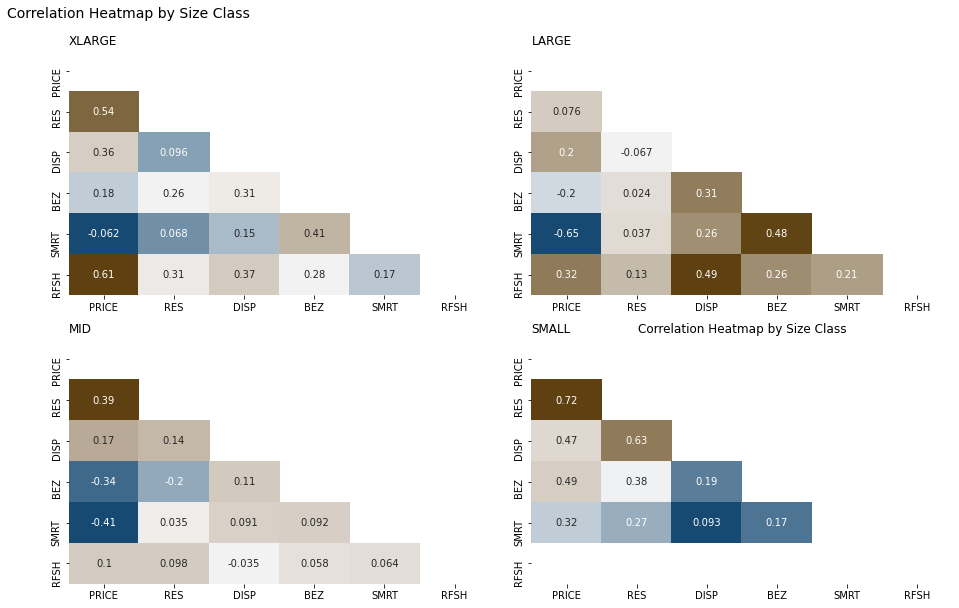

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 8))
plt.title('Correlation Heatmap by Size Class')
plt.tight_layout()

hide = np.triu(np.ones_like(ALL_corr.loc['XLARGE'], dtype=bool))
sns.heatmap(ALL_corr.loc['XLARGE'], ax=axes[0,0], annot=True, mask = hide, cmap=cmap, cbar=False)
axes[0,0].set_title('XLARGE', loc='left', fontweight='light')

hide = np.triu(np.ones_like(ALL_corr.loc['LARGE'], dtype=bool))
sns.heatmap(ALL_corr.loc['LARGE'], ax=axes[0,1], annot=True, mask = hide, cmap=cmap, cbar=False)
axes[0,1].set_title('LARGE', loc='left', fontweight='light')

hide = np.triu(np.ones_like(ALL_corr.loc['MID'], dtype=bool))
sns.heatmap(ALL_corr.loc['MID'], ax=axes[1,0], annot=True, mask = hide, cmap=cmap, cbar=False)
axes[1,0].set_title('MID', loc='left', fontweight='light')

hide = np.triu(np.ones_like(ALL_corr.loc['SMALL'], dtype=bool))
sns.heatmap(ALL_corr.loc['SMALL'], ax=axes[1,1], annot=True, mask = hide, cmap=cmap, cbar=False)
axes[1,1].set_title('SMALL', loc='left', fontweight='light')

fig.suptitle('Correlation Heatmap by Size Class', fontsize=14, y=1.05, fontweight='normal', x=0.1)

## Heat Map Findings
1. Very few variables had high correlation (and only 1 had over 0.7), maybe branding is the biggest factor
2. Unsurprisingly, highest correlation to price from Resolution<br>
    However, there is no such correlation for LARGE (45-60") TVs
3. LARGE size TVs show a negative correlation btwn Price and smart capable
4. Bezel size only had correlation with Price for SMALL TVs
5. XLARGE TV market players may be trying to differentiate on Refresh Rate (Gaming Market?)

## Further investigate each of these findings

#### 1. Very few variables had high correlation (and only 1 had over 0.7), maybe branding is the biggest factor

In [21]:
bby.groupby('manufacturer').median()['regular_px'].sort_values(ascending=False).index

Index(['Sony', 'Samsung', 'LG', 'Others', 'VIZIO', 'Hisense', 'TCL',
       'Insignia™'],
      dtype='object', name='manufacturer')

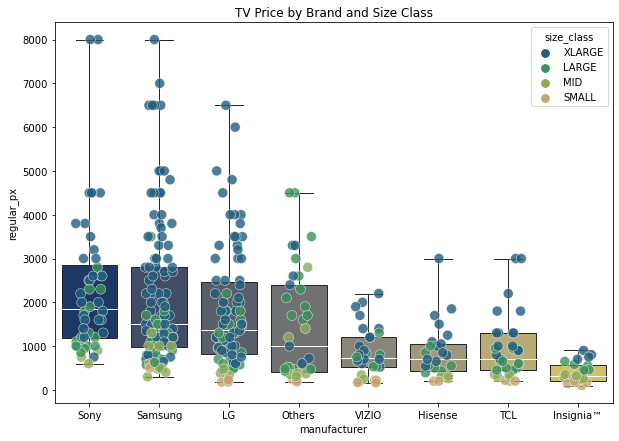

In [22]:
fig = plt.gcf()
fig.set_size_inches(10,7)

# set order of x-axis categories
order = bby.groupby('manufacturer').median()['regular_px'].sort_values(ascending=False).index
hue_order = bby.groupby('size_class').median()['screen_size'].sort_values(ascending=False).index

# change median line to white
PROPS = {'medianprops':{'color':'white'}}

# Plot scatter over boxplot
ax = sns.boxplot(data = bby, x='manufacturer', y='regular_px',
                order=order, palette='cividis', linewidth=1, whis=np.inf, **PROPS)\
                .set_title('TV Price by Brand and Size Class')
ax = sns.stripplot(data = bby, x='manufacturer', y='regular_px', hue='size_class', jitter=0.2, 
                   order=order, hue_order=hue_order, size=10,
                   palette='gist_earth', linewidth=0.5, edgecolor='w', alpha=0.8)
plt.show()

#### 2. Unsurprisingly, highest correlation to price from Resolution, however, there is no such correlation for LARGE (45-60") TVs

In [27]:
# for LARGE Tvs, all are 4K except 1
bby.groupby(['size_class','resolution']).count()['regular_px']

size_class  resolution     
LARGE       4K (2160p)         104
            8K (4320p)           1
MID         4K (2160p)          30
            Full HD (1080p)     11
            HD (720p)            1
SMALL       4K (2160p)           2
            Full HD (1080p)      8
            HD (720p)           17
XLARGE      4K (2160p)         192
            8K (4320p)          23
Name: regular_px, dtype: int64

#### 3. LARGE size TVs show a negative correlation btwn Price and smart capable

Text(0.5, 1.0, 'Smart Capable vs Price (LARGE TVs)')

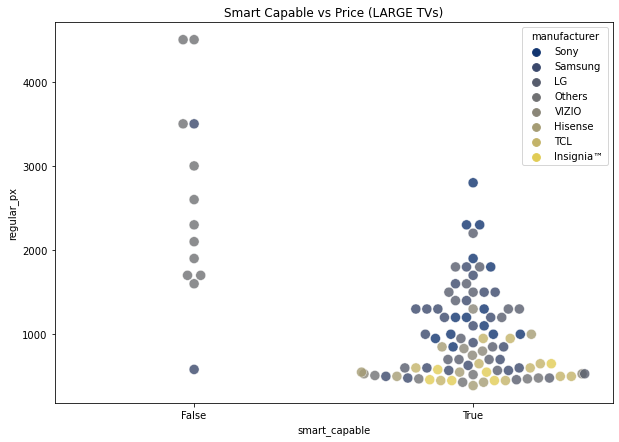

In [28]:
fig = plt.gcf()
fig.set_size_inches(10,7)

# # set order of x-axis categories
hue_order = bby.groupby('manufacturer').median()['regular_px'].sort_values(ascending=False).index
# hue_order = bby.groupby('size_class').median()['screen_size'].sort_values(ascending=False).index

sns.swarmplot(data = bby[bby.size_class=='LARGE'], x='smart_capable', y='regular_px', hue='manufacturer', 
              size = 10, hue_order=hue_order,
              palette='cividis', linewidth=0.5, edgecolor='w', alpha=0.8)\
                .set_title('Smart Capable vs Price (LARGE TVs)')

#### Further Analysis of the 13 non-Smart-Capable TVs
- Word Cloud of their Descriptions?

#### 4. Bezel size only had correlation with Price for SMALL TVs

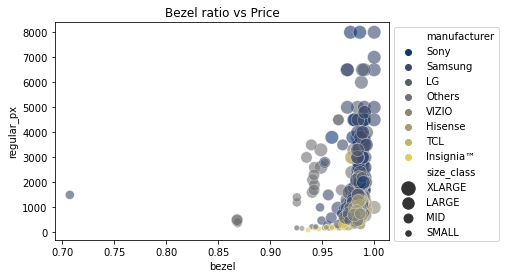

In [29]:
# set order of x-axis categories
hue_order = bby.groupby('manufacturer').median()['regular_px'].sort_values(ascending=False).index
size_order = bby.groupby('size_class').median()['screen_size'].sort_values(ascending=False).index

sns.scatterplot(data = bby, x='bezel', y='regular_px', hue='manufacturer', hue_order=hue_order,
                size = 'size_class', sizes=(30, 180), size_order=size_order,
                palette='cividis', linewidth=0.5, edgecolor='w', alpha=0.6)\
                .set_title('Bezel ratio vs Price')
plt.legend(bbox_to_anchor=(1, 1))

#### Get rid of the Ugly TV from manufacturer Others, with a 0.7 bezel ratio
- go through each manuf and remove bezel outliers ( >3 std)

In [30]:
bby2 = rem_outlier(bby,'bezel', 3)

In [31]:
# 5 rows removed
bby2.shape[0] - bby.shape[0]

-5

#### Use stats.linregress() to find trend line

In [32]:
x_vals = bby2.bezel
y_vals = bby2.regular_px
# Get slope, intercept from stats.linregress()
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_vals,y_vals)

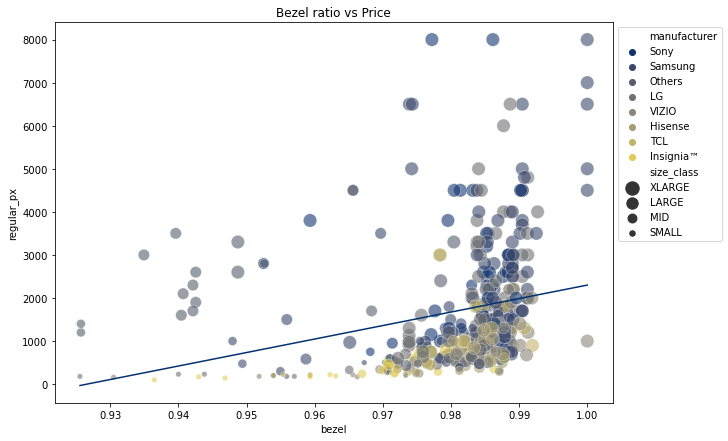

In [33]:
fig = plt.gcf()
fig.set_size_inches(10,7)
# set order of x-axis categories
hue_order = bby2.groupby('manufacturer').median()['regular_px'].sort_values(ascending=False).index
size_order = bby2.groupby('size_class').median()['screen_size'].sort_values(ascending=False).index

# Plot sns scatter
sns.scatterplot(data = bby2, x='bezel', y='regular_px', hue='manufacturer', hue_order=hue_order,
                size = 'size_class', sizes=(30, 180), size_order=size_order,
                palette='cividis', linewidth=0.5, edgecolor='w', alpha=0.6)\
                .set_title('Bezel ratio vs Price')
# Plot linear regression line
y_pred = intercept + slope*x_vals
sns.lineplot(x=x_vals, y=y_pred)

plt.legend(bbox_to_anchor=(1, 1))

# What about Reviews ⭐⭐⭐⭐?

## Remove review score & review count outliers

In [34]:
bby3 = rem_outlier(bby2,['review_average','review_count'], 4)

In [35]:
# 27 outliers removed
bby3.shape[0] - bby2.shape[0]

-27

In [36]:
# Create separate DF for calculation of correlations
bb_corr = bby3[['review_count','regular_px','screen_size','res_pixels','display_type','bezel','weight_nostand',
               'smart_capable','warranty_yrs','energy_KWh','refresh_Hz']]
bb_corr.columns = ['REVc','PRICE','SIZE','RES','DISP','BEZ','WGT','SMRT','WARR','ENRG','RFSH']

In [37]:
bb_corr.corr()

,REVc,PRICE,SIZE,RES,DISP,BEZ,WGT,SMRT,WARR,ENRG,RFSH
REVc,1.000000,-0.281617,-0.235398,-0.233239,-0.084435,-0.159717,-0.268827,-0.043482,-0.094287,-0.231743,-0.171459
PRICE,-0.281617,1.000000,0.597402,0.594655,0.374883,0.336266,0.708976,-0.009103,0.148908,0.605924,0.615447
SIZE,-0.235398,0.597402,1.000000,0.497552,0.170133,0.626231,0.919319,0.227909,-0.017395,0.650558,0.400210
RES,-0.233239,0.594655,0.497552,1.000000,0.183941,0.480329,0.476327,0.170936,-0.003701,0.662829,0.386462
DISP,-0.084435,0.374883,0.170133,0.183941,1.000000,0.350710,0.135642,0.169581,-0.100494,0.117914,0.441061
BEZ,-0.159717,0.336266,0.626231,0.480329,0.350710,1.000000,0.449953,0.505564,-0.189831,0.419712,0.400963
WGT,-0.268827,0.708976,0.919319,0.476327,0.135642,0.449953,1.000000,0.104710,0.057895,0.641806,0.474124
SMRT,-0.043482,-0.009103,0.227909,0.170936,0.169581,0.505564,0.104710,1.000000,-0.495444,0.111173,0.196662
WARR,-0.094287,0.148908,-0.017395,-0.003701,-0.100494,-0.189831,0.057895,-0.495444,1.000000,-0.021731,-0.035839
ENRG,-0.231743,0.605924,0.650558,0.662829,0.117914,0.419712,0.641806,0.111173,-0.021731,1.000000,0.429043


<AxesSubplot:>

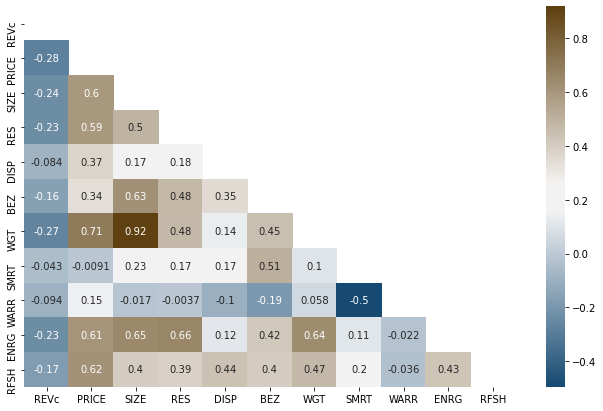

In [38]:
fig, ax = plt.subplots(figsize=(11, 7))

# Hide upper redundant heatmap
hide = np.triu(np.ones_like(bb_corr.corr(), dtype=bool))

# Configure a custom diverging colormap
n_plots = 10
cmap = sns.diverging_palette(245,50, s=90, l=30, sep=20, n=n_plots, as_cmap=True)

# Draw the heatmap
sns.heatmap(bb_corr.corr(), annot=True, mask = hide, cmap=cmap)

### Scatterplots

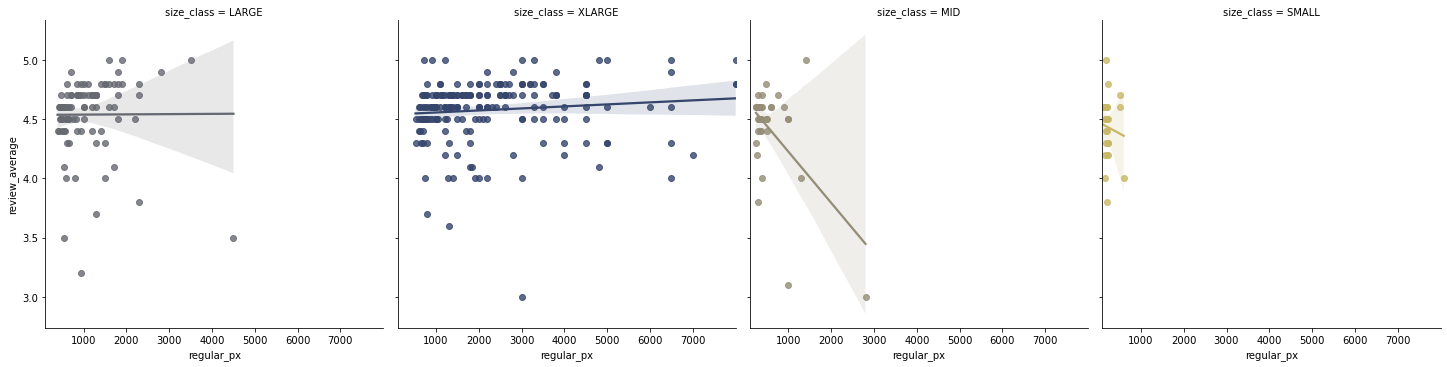

In [39]:
# Review scores and Price
hue_order = bby.groupby('size_class').median()['screen_size'].sort_values(ascending=False).index

sns.lmplot(data = bby3,
           x='regular_px', 
           y='review_average',
           col='size_class',
           hue='size_class', hue_order=hue_order,
           palette='cividis')

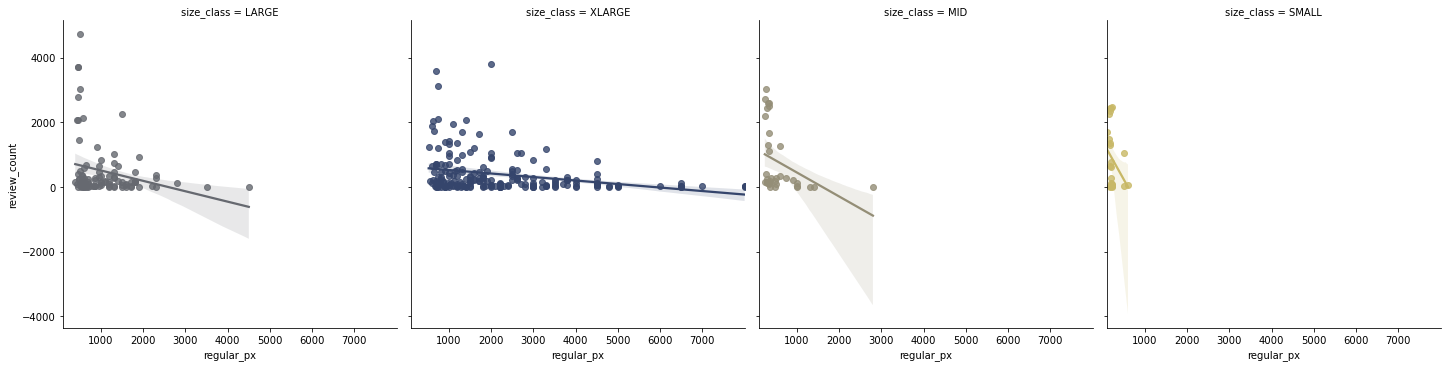

In [40]:
# Review counts and Price
hue_order = bby.groupby('size_class').median()['screen_size'].sort_values(ascending=False).index

sns.lmplot(data = bby3,
           x='regular_px',
           y='review_count',
           col='size_class',
           hue='size_class', hue_order=hue_order,
           palette='cividis')